# **AI ANN**
# **60 face predict example**
# **include 2 datasets of 2 people, then predict**

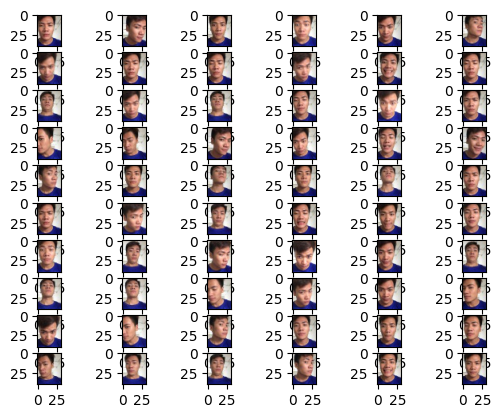

In [19]:
# people 1
# 60 images, resize to (40x30) pixels 

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/iCloudDrive/AI_image/'
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'truong'+str(i+1)+'.jpg'
  img = plt.imread(filename)
  plt.imshow(img)
plt.show()

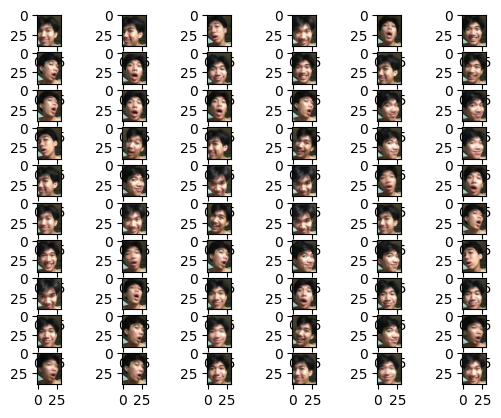

In [20]:
# people 2

import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/iCloudDrive/AI_image/'
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'minh'+str(i+1)+'.jpg'
  img = plt.imread(filename)
  plt.imshow(img)
plt.show()

In [24]:
from os import listdir    # goi he dieu hanh OS 
from numpy import asarray 
from numpy import save 
from keras.utils import load_img, img_to_array 
folder = '/content/drive/MyDrive/iCloudDrive/AI_image/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('truong'):
    output = 1
  if file.startswith('minh'):
    output = 2
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('truong_minh_photos.npy', photos)
save('truong_minh_labels.npy', labels)

(120, 30, 40, 3) (120,)


In [26]:
import numpy as np
x_train = np.load('truong_minh_photos.npy')
y_train = np.load('truong_minh_labels.npy')
print(x_train.shape)
print(y_train.shape)

(120, 30, 40, 3)
(120,)


In [27]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# #128 lan tich chap
# model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=250,epochs = 100,verbose = 1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 20, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 8, 10, 64)        

1/1 [==============================] - 0s 176ms/step


'minh'

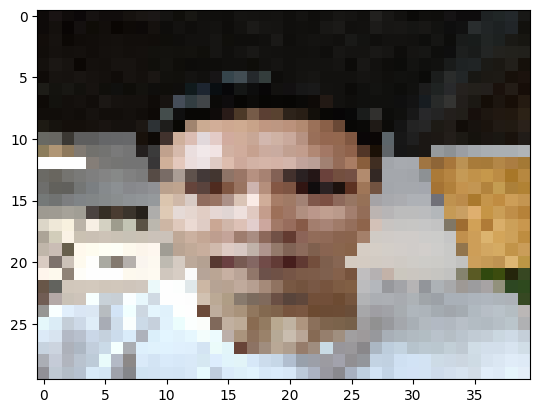

In [34]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'truong',2:'minh'}
img = load_img("/content/drive/MyDrive/iCloudDrive/AI_image/predict.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]